<a href="https://colab.research.google.com/github/sambethune/causal_learning/blob/journals/28_2_%3E06_3_nb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horse or Not Quite Horse?

We are seeking to contruct a classification model to distinguish whether a given image is of a horse, or not quite a horse. Let us begin by mounting our drive and updating the fastai library before importing the vision package it in its entirety. Importing the entire package sacrifices computer memory for the sake of development time, a compromise we consider worthwhile in this context.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!curl -s https://course.fast.ai/setup/colab | bash

from fastai.vision import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Updating fastai...
Done.


Next we specify our path for the proceeding investigation;

In [0]:
path = Path('/content/drive/My Drive/SCIE3250 Journal/28 2->06 3/data/horse_\
or_not_quite_horse')

And download the images from our sets of links.

In [3]:
classes = ['horse', 'not_quite_horse']

for c in classes:
  folder = path/c
  fname = c+'.txt'
  folder.mkdir(parents=True, exist_ok=True)
  download_images(folder/fname, folder)
  verify_images(path/c, delete=True)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

cannot identify image file <_io.BufferedReader name='/content/drive/My Drive/SCIE3250 Journal/28 2->06 3/data/horse_or_not_quite_horse/horse/00000006.jpg'>


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

To begin working with our data, we create an ImageDataBunch using the DataBlock API and check that our images have been downloaded correctly.

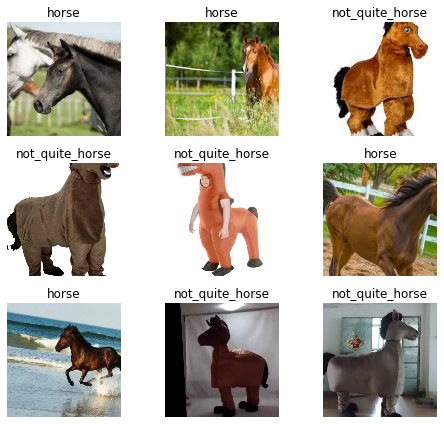

In [5]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,6))

We proceed to compute our model.

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.550036,2.015957,0.652174,00:04
1,1.509800,1.363594,0.434783,00:03
2,1.087888,0.859554,0.217391,00:03
3,0.810286,0.558269,0.130435,00:03


In [0]:
learn.save('stage-1')

While this is a reasonable model, we wonder if we can do better by adjusting our learning rate.

In [0]:
learn.load('stage-1')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


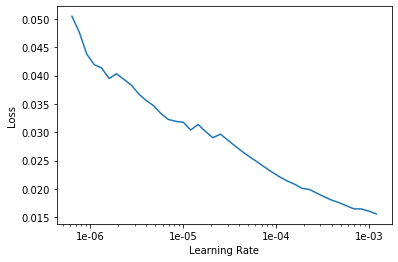

In [11]:
learn.lr_find()
learn.recorder.plot()

Seeing that the steepest phase of primary descent occurs around 1e-06 to 1e-05, we adjust our learning rate accordingly before training over two more epochs.

In [18]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.071859,0.367376,0.130435,00:03
1,0.056226,0.282109,0.043478,00:03


In [0]:
learn.save('stage-1r')

Now that our model is fairly accurate, let's have a look at some of the problematic images.

In [20]:
learn.load('stage-1r')

Learner(data=ImageDataBunch;

Train: LabelList (95 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
horse,horse,horse,horse,horse
Path: /content/drive/My Drive/SCIE3250 Journal/28 2->06 3/data/horse_or_not_quite_horse;

Valid: LabelList (23 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
horse,not_quite_horse,horse,horse,horse
Path: /content/drive/My Drive/SCIE3250 Journal/28 2->06 3/data/horse_or_not_quite_horse;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64

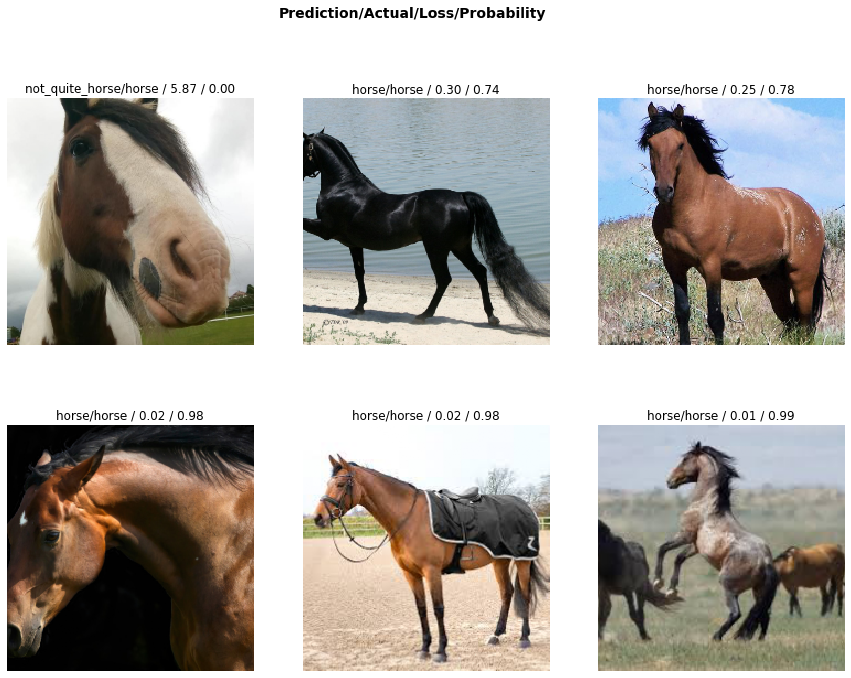

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(6, figsize=(15,11))

Without having to plot the confusion matrix, we see immediately that our model is somewhat too suspicious of real horses while easily able to spot the fakes. In the future we could stand to gain from greatly increasing the number of real horses in the data set and accordingly changing our evaluation metric to the F1 score or even simply the precision itself (in the case that we treat 'not quite horses' as positives). For now though, we consider our model to have yielded a positive 'proof of concept' result.